# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 3.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 912.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 27.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 1.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 11.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 35.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/c5/05/c214b32d21c0b465506f95c4f28ccbcba15022e000b043b72b3df7728471/urllib3-1.26.16-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 941.6 kB/s et

In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

In [4]:
import os
from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor
from sagemaker import get_execution_role
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker.debugger import Rule, DebuggerHookConfig,  CollectionConfig, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile, TensorBoardOutputConfig
from sagemaker.analytics import HyperparameterTuningJobAnalytics


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [5]:
#TODO: Fetch and upload the data to AWS S3
session = sagemaker.Session()
bucket= session.default_bucket()
print("Default Bucket: {}".format(bucket))
region = session.boto_region_name
print("AWS Region: {}".format(region))
role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

Default Bucket: sagemaker-us-east-1-386490661131
AWS Region: us-east-1
RoleArn: arn:aws:iam::386490661131:role/service-role/AmazonSageMaker-ExecutionRole-20230903T121221
--2023-09-03 11:55:54--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.0, 52.219.121.16, 52.219.117.152, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  46.3MB/s    in 27s     

2023-09-03 11:56:24 (39.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/

In [6]:
!aws s3 cp dogImages s3://sagemaker-us-east-1-386490661131/proj3/ --recursive

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00047.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg to s3://sagemaker-us-east-1-386490661131/proj3/test/001.Affenpinscher/Affenpinscher_00071.jpg
upload: dogImages/test/002.Afghan_hound/Afghan

In [43]:
BUCKET = 'sagemaker-us-east-1-386490661131/proj3'

os.environ['SM_CHANNEL_TRAINING']=f's3://{BUCKET}/'
os.environ['SM_MODEL_DIR']=f's3://{BUCKET}/model/'
os.environ['SM_OUTPUT_DATA_DIR']=f's3://{BUCKET}/output/'

data_channels = {
    "train": "s3://{}/train/".format(BUCKET),
    "test": "s3://{}/test/".format(BUCKET),
    "valid": "s3://{}/valid/".format(BUCKET)
}

role = sagemaker.get_execution_role()

In [64]:
print(os.environ.get('SM_MODEL_DIR'))


s3://sagemaker-us-east-1-386490661131/proj3/model/


In [63]:
print(os.environ.get('SM_CHANNEL_TRAINING'))
print(os.environ.get('SM_OUTPUT_DATA_DIR'))

s3://sagemaker-us-east-1-386490661131/proj3/
s3://sagemaker-us-east-1-386490661131/proj3/output/


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [52]:
# Declare HP ranges and metrics
hyperparameter_ranges = {
    "lr": sagemaker.tuner.ContinuousParameter(0.001, 0.1),
    "batch-size": sagemaker.tuner.CategoricalParameter([32, 64, 128, 256, 512]),
}

objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]


In [53]:
#TODO: Create estimators for your HPs

# Create estimator
from sagemaker.pytorch import PyTorch
estimator = PyTorch(
    entry_point="hpo_v2.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)


tuner = sagemaker.tuner.HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [54]:
# TODO: Fit your HP Tuner
#tuner.fit() # TODO: Remember to include your data channels
tuner.fit({"training": f"s3://{BUCKET}/"}, wait=False)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


Using provided s3_resource


In [65]:
tuner.best_training_job()

'pytorch-training-230903-1547-001-8193f2e5'

In [62]:
# Get the best estimators and the best HPs
best_estimator = tuner.best_estimator()

# Get the hyperparameters of the best trained model
best_estimator.hyperparameters()



2023-09-03 15:57:42 Starting - Preparing the instances for training
2023-09-03 15:57:42 Downloading - Downloading input data
2023-09-03 15:57:42 Training - Training image download completed. Training in progress.
2023-09-03 15:57:42 Uploading - Uploading generated training model
2023-09-03 15:57:42 Completed - Resource reused by training job: pytorch-training-230903-1547-003-af1837c5


{'_tuning_objective_metric': '"Test Loss"',
 'batch-size': '"64"',
 'lr': '0.014068276127777892',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-09-03-15-47-14-565"',
 'sagemaker_program': '"hpo_v2.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-15-47-14-565/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [66]:
hyperparameter_values = {
    "lr": 0.014068276127777892,
    "batch-size": 64,
}

In [67]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

In [68]:
from sagemaker.debugger import ProfilerConfig, FrameworkProfile
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

debugger_config = DebuggerHookConfig(
    hook_parameters={
        "train.save_interval": "1",
        "eval.save_interval": "1"
    }
)

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [69]:
# TODO: Create and fit an estimator
import sagemaker
from sagemaker.pytorch import PyTorch
estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.xlarge",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version='py36',
    hyperparameters=hyperparameter_values,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)

In [70]:
estimator.fit({"training": f"s3://{BUCKET}/"})

Using provided s3_resource


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-09-03-18-47-31-979


2023-09-03 18:47:32 Starting - Starting the training job...
2023-09-03 18:47:56 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2023-09-03 18:49:02 Downloading - Downloading input data......
2023-09-03 18:50:02 Training - Downloading the training image...
2023-09-03 18:50:22 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-09-03 18:50:18,476 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-09-03 18:50:18,479 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2023-09-03 18:50:18,488 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-09-03 18:50:18,490 sagemaker_pytorch_container.training INFO

In [71]:
# TODO: Plot a debugging output.
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)
description

{'TrainingJobName': 'pytorch-training-2023-09-03-18-47-31-979',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:386490661131:training-job/pytorch-training-2023-09-03-18-47-31-979',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'batch-size': '64',
  'lr': '0.014068276127777892',
  'sagemaker_container_log_level': '20',
  'sagemaker_job_name': '"pytorch-training-2023-09-03-18-47-31-979"',
  'sagemaker_program': '"train_model.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-cpu-py36',
  'TrainingInputMode': 'File',
  'EnableSageMakerMetricsTimeSeries': True},
 'Ro

In [87]:
description

{'TrainingJobName': 'pytorch-training-2023-09-03-18-47-31-979',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:386490661131:training-job/pytorch-training-2023-09-03-18-47-31-979',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'batch-size': '64',
  'lr': '0.014068276127777892',
  'sagemaker_container_log_level': '20',
  'sagemaker_job_name': '"pytorch-training-2023-09-03-18-47-31-979"',
  'sagemaker_program': '"train_model.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-cpu-py36',
  'TrainingInputMode': 'File',
  'EnableSageMakerMetricsTimeSeries': True},
 'Ro

In [79]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/rule-output


In [80]:
! aws s3 ls {rule_output_path} --recursive

2023-09-03 18:56:39     365068 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-09-03 18:56:38     212123 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-09-03 18:56:33        191 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-09-03 18:56:33        199 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-09-03 18:56:33       2128 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-09-03 18:56:33        127 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-09-03 18:56:33        198 pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-re

In [81]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-report.html to ProfilerReport/profiler-output/profiler-report.html
download: s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json to ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json
download: s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-386490661131/pytorch-training-2

In [82]:
import os, IPython
# get the autogenerated folder name of profiler report
profiler_report_name = [rule["RuleConfigurationName"] for rule in estimator.latest_training_job.rule_job_summary()
                        if "Profiler" in rule["RuleConfigurationName"]
                       ][0]

print(profiler_report_name)
IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

ProfilerReport


**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

## Model Deploying

In [83]:
# TODO: Deploy your model to an endpoint

#predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances
from sagemaker.predictor import Predictor
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer
        )

In [86]:
model_location=estimator.model_data
print(model_location)

s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/output/model.tar.gz


In [85]:
from sagemaker.pytorch import PyTorchModel
pytorch_model = PyTorchModel(model_data=model_location, 
                             role=role, 
                             entry_point='inference.py',
                             py_version='py36',
                             framework_version='1.8',
                             predictor_cls=ImagePredictor)

In [88]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-386490661131/pytorch-training-2023-09-03-18-47-31-979/output/model.tar.gz), script artifact (None), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-386490661131/pytorch-inference-2023-09-03-19-49-17-588/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-inference-2023-09-03-19-49-26-433
INFO:sagemaker:Creating endpoint-config with name pytorch-inference-2023-09-03-19-49-27-199
INFO:sagemaker:Creating endpoint with name pytorch-inference-2023-09-03-19-49-27-199


------!

In [89]:
# TODO: Run an prediction on the endpoint

with open("random_test.jpg", "rb") as image:
    f = image.read()
    img_bytes = bytearray(f)

type(img_bytes)

bytearray

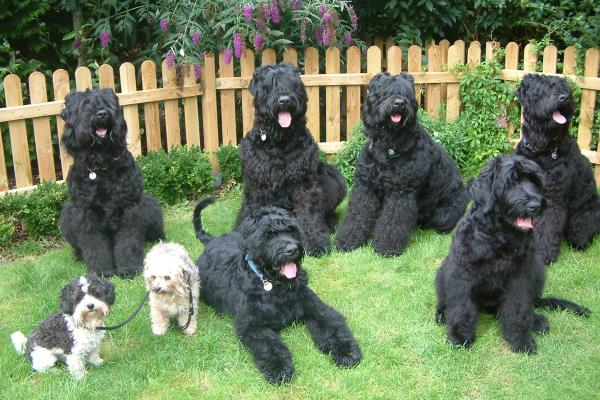

In [90]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [91]:
response=predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [92]:
print("Raw prediction result:")
print(response)
print()

labeled_predictions = list(zip(range(133), response[0]))
print("Labeled predictions: ")
print(labeled_predictions)
print()

labeled_predictions.sort(key=lambda label_and_prob: 1.0 - label_and_prob[1])
print("Prediction: {}".format(labeled_predictions[0]))

Raw prediction result:
[[0.03474677354097366, -0.0004673959920182824, 0.12356793880462646, 0.003161361441016197, 0.18072883784770966, 0.05612235888838768, -0.1283261775970459, 0.022463878616690636, -0.05407410115003586, -0.008867538534104824, -0.05318799614906311, 0.0924883633852005, -0.07523881644010544, 0.16568604111671448, -0.10259055346250534, 0.00773140462115407, -0.08153247088193893, 0.018069341778755188, 0.08120286464691162, 0.03299027308821678, 0.06489886343479156, -0.06664157658815384, 0.046328723430633545, -0.02007601037621498, -0.08508822321891785, 0.022623831406235695, 0.0713634118437767, 0.01993374340236187, -0.0035085680428892374, 0.0548979789018631, -0.07836800813674927, -0.018369542434811592, 0.09363950788974762, 0.038693949580192566, 0.011061341501772404, 0.013403141871094704, 0.08077948540449142, 0.03929072991013527, 0.051782697439193726, -0.036054521799087524, 0.0956568717956543, 0.05790048465132713, 0.07157879322767258, -0.03056478127837181, 0.1249377429485321, 0.01

In [93]:
with open("random_test2.jpg", "rb") as image:
    f = image.read()
    img_bytes = bytearray(f)

type(img_bytes)

bytearray

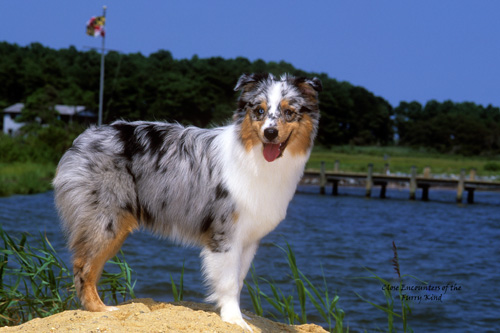

In [97]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [95]:
response=predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [96]:
print("Raw prediction result:")
print(response)
print()

labeled_predictions = list(zip(range(133), response[0]))
print("Labeled predictions: ")
print(labeled_predictions)
print()

labeled_predictions.sort(key=lambda label_and_prob: 1.0 - label_and_prob[1])
print("Prediction: {}".format(labeled_predictions[0]))

Raw prediction result:
[[-1.2548998594284058, -0.5750800967216492, -1.063321828842163, -1.6714951992034912, -1.5277575254440308, -1.0353631973266602, -1.4361573457717896, -1.4700336456298828, -2.0363402366638184, -1.6428678035736084, -1.041662335395813, -0.44778478145599365, -1.2886327505111694, -1.6773813962936401, -1.322177767753601, -0.9319279789924622, -1.4225497245788574, -0.8500964641571045, -1.0485734939575195, -1.2652440071105957, -2.163604736328125, -2.180600166320801, -0.4341686964035034, -1.5050920248031616, -1.6280136108398438, -1.821399450302124, -0.9067134261131287, -0.9812068343162537, -0.46761631965637207, -1.7263880968093872, -1.30916428565979, -2.101546049118042, -1.3824793100357056, -2.0227701663970947, -1.1203871965408325, -0.8904229998588562, -0.5915643572807312, -1.9304875135421753, -0.4535506069660187, -1.4982351064682007, -2.236802101135254, -0.18173468112945557, -1.9831676483154297, -1.623484492301941, -0.9572328329086304, -1.2417519092559814, -2.09067296981811

In [98]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-inference-2023-09-03-19-49-27-199
INFO:sagemaker:Deleting endpoint with name: pytorch-inference-2023-09-03-19-49-27-199
